# Problem Statement:
### 1. Subsidy Inc. delivers subsidies to individuals based on their income.
### 2. Accurate income data is one of the hardest piece of data to obtain across the world.
### 3. Subsidy Inc. has obtained a large data set of authenticated data on individual income, demographic parameters, and a few financial parameters.
### 4. Subsidy Inc. wishes us to:
###        Develop an income classifier system for individuals.

In [4]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt



In [5]:
df = pd.read_csv("../data/income(1).csv", na_values=[" ?"])

In [6]:
df.head()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"


In [7]:
df.shape

(31978, 13)

## Step - 1:
###             Write the name of the variables with its datatype, description and categories of the variables.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        30169 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     30162 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


In [9]:
df.describe()

,age,capitalgain,capitalloss,hoursperweek
count,31978.000000,31978.000000,31978.000000,31978.000000
mean,38.579023,1064.360623,86.739352,40.417850
std,13.662085,7298.596271,401.594301,12.345285
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


In [10]:
#to display categorical values
df.describe(include ="O")

,JobType,EdType,maritalstatus,occupation,relationship,race,gender,nativecountry,SalStat
count,30169,31978,31978,30162,31978,31978,31978,31978,31978
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,"less than or equal to 50,000"
freq,22286,10368,14692,4038,12947,27430,21370,29170,24283


In [11]:
df['JobType'].value_counts()

JobType
 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64

In [12]:
df['EdType'].value_counts()

EdType
 HS-grad         10368
 Some-college     7187
 Bachelors        5210
 Masters          1674
 Assoc-voc        1366
 11th             1167
 Assoc-acdm       1055
 10th              921
 7th-8th           627
 Prof-school       559
 9th               506
 12th              417
 Doctorate         390
 5th-6th           318
 1st-4th           163
 Preschool          50
Name: count, dtype: int64

In [13]:
df['relationship'].value_counts()

relationship
 Husband           12947
 Not-in-family      8156
 Own-child          5005
 Unmarried          3384
 Wife               1534
 Other-relative      952
Name: count, dtype: int64

In [14]:
df['race'].value_counts()

race
 White                 27430
 Black                  3028
 Asian-Pac-Islander      956
 Amer-Indian-Eskimo      311
 Other                   253
Name: count, dtype: int64

In [15]:
df['gender'].value_counts()

gender
 Male      21370
 Female    10608
Name: count, dtype: int64

In [16]:
df['nativecountry'].value_counts()

nativecountry
 United-States                 29170
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                 

In [17]:
df['SalStat'].value_counts()

SalStat
 less than or equal to 50,000    24283
 greater than 50,000              7695
Name: count, dtype: int64

# Step 2, 3:
## Identify if data is clean and Look for missing values

In [18]:
df.isnull().sum()

age                 0
JobType          1809
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64

In [19]:
#Droping Missing Values
df = df.dropna(axis=0)
df.shape

(30162, 13)

# Step 4: 
## Identify variables influencing salary status and look for possible relationships between variables

In [29]:
# correlation =  df.corr()
# correlation
# Assuming 'df' is your DataFrame
df_encoded = pd.get_dummies(df, columns=['JobType', 'EdType', 'maritalstatus', 'occupation', 'relationship', 'race', 'gender', 'nativecountry', 'SalStat'])

# Now, check correlations
correlation = df_encoded.corr()


#### Gender and Salary Status

In [30]:
pd.crosstab(index = df["gender"], columns = df["SalStat"])

SalStat,"greater than 50,000","less than or equal to 50,000"
gender,,
Female,1112,8670
Male,6396,13984


c:\Users\rutuk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rutuk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rutuk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rutuk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

<Axes: xlabel='count', ylabel='gender'>

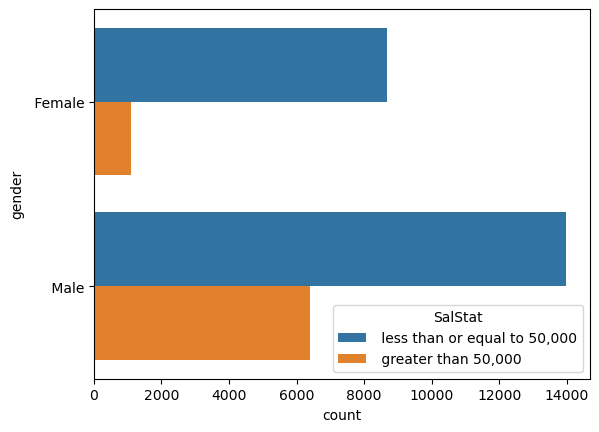

In [31]:
sns.countplot(y=df['gender'],hue = 'SalStat', data=df)

#### Age and Salary Status

In [32]:
pd.crosstab(index = df["age"], columns = df["SalStat"])

SalStat,"greater than 50,000","less than or equal to 50,000"
age,,
17,0,328
18,0,447
19,1,593
20,0,629
21,3,618
...,...,...
84,1,7
85,0,3
86,0,1


In [33]:
# sns.boxplot('SalStat','age',data = df)

#### Hours Per Week and Salary Status

In [34]:
pd.crosstab(index = df["hoursperweek"], columns = df["SalStat"], normalize='index', margins=True)

SalStat,"greater than 50,000","less than or equal to 50,000"
hoursperweek,,
1,0.142857,0.857143
2,0.133333,0.866667
3,0.041667,0.958333
4,0.074074,0.925926
5,0.157895,0.842105
...,...,...
96,0.200000,0.800000
97,0.500000,0.500000
98,0.272727,0.727273


c:\Users\rutuk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rutuk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rutuk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


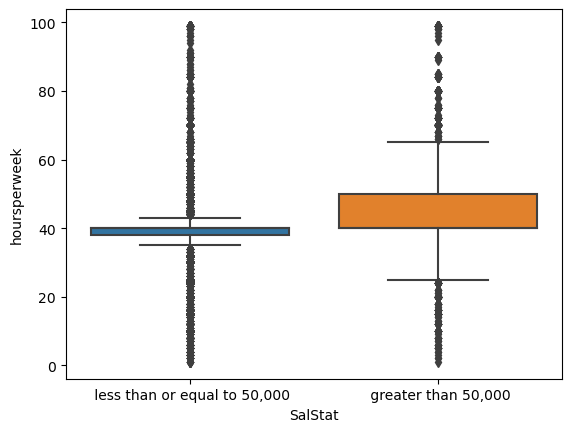

In [38]:
# sns.boxplot('SalStat','hoursperweek', data = income)
sns.boxplot(x='SalStat', y='hoursperweek', data=df)
plt.show()

#### Job Type and Salary Status

In [39]:
pd.crosstab(index = df["JobType"], columns = df["SalStat"], margins=True, normalize='index')

SalStat,"greater than 50,000","less than or equal to 50,000"
JobType,,
Federal-gov,0.387063,0.612937
Local-gov,0.294630,0.705370
Private,0.218792,0.781208
Self-emp-inc,0.558659,0.441341
Self-emp-not-inc,0.285714,0.714286
State-gov,0.268960,0.731040
Without-pay,0.000000,1.000000
All,0.248922,0.751078


c:\Users\rutuk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rutuk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rutuk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rutuk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

<Axes: xlabel='count', ylabel='JobType'>

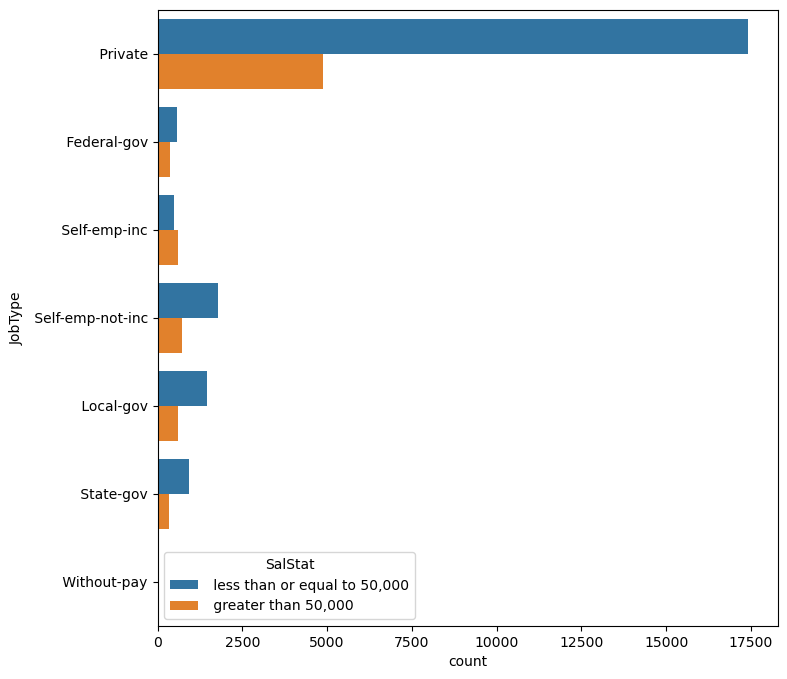

In [40]:
ax, fig = plt.subplots(figsize=[8,8])
sns.countplot(y=df['JobType'],hue = 'SalStat', data=df)

#### Education Type and Salary Status

In [41]:
pd.crosstab(index = df["EdType"], columns = df['SalStat'],margins = True,normalize ='index')

SalStat,"greater than 50,000","less than or equal to 50,000"
EdType,,
10th,0.071951,0.928049
11th,0.056298,0.943702
12th,0.076923,0.923077
1st-4th,0.039735,0.960265
5th-6th,0.041667,0.958333
7th-8th,0.062837,0.937163
9th,0.054945,0.945055
Assoc-acdm,0.253968,0.746032
Assoc-voc,0.263198,0.736802


c:\Users\rutuk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rutuk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rutuk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rutuk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

<Axes: xlabel='count', ylabel='EdType'>

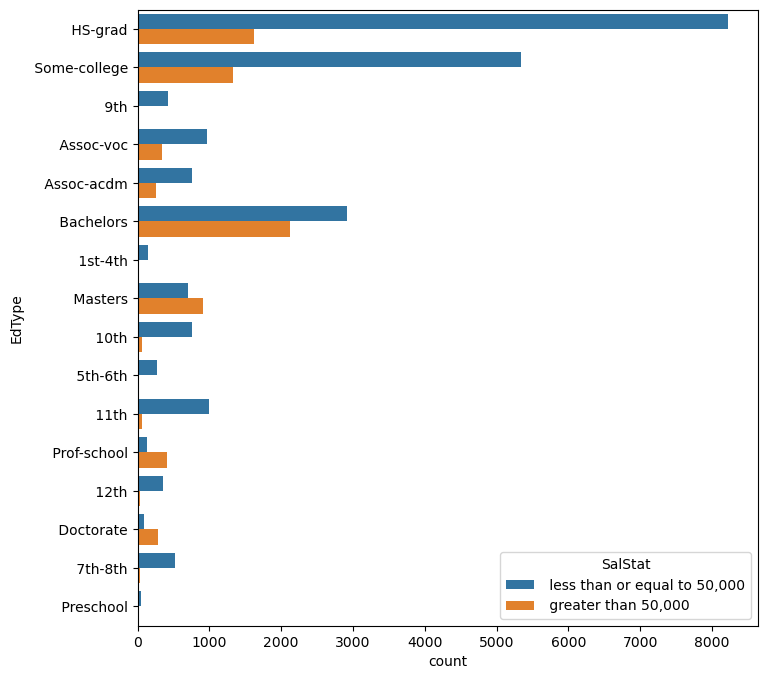

In [42]:
ax, fig = plt.subplots(figsize=[8,8])
sns.countplot(y=df['EdType'],hue = 'SalStat', data=df)

#### Occupation and Salary Status

In [43]:
pd.crosstab(index = df["occupation"], columns =df['SalStat'],margins = True,normalize = 'index')  

SalStat,"greater than 50,000","less than or equal to 50,000"
occupation,,
Adm-clerical,0.133835,0.866165
Armed-Forces,0.111111,0.888889
Craft-repair,0.225310,0.774690
Exec-managerial,0.485220,0.514780
Farming-fishing,0.116279,0.883721
Handlers-cleaners,0.061481,0.938519
Machine-op-inspct,0.124619,0.875381
Other-service,0.041096,0.958904
Priv-house-serv,0.006993,0.993007


c:\Users\rutuk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rutuk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rutuk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rutuk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

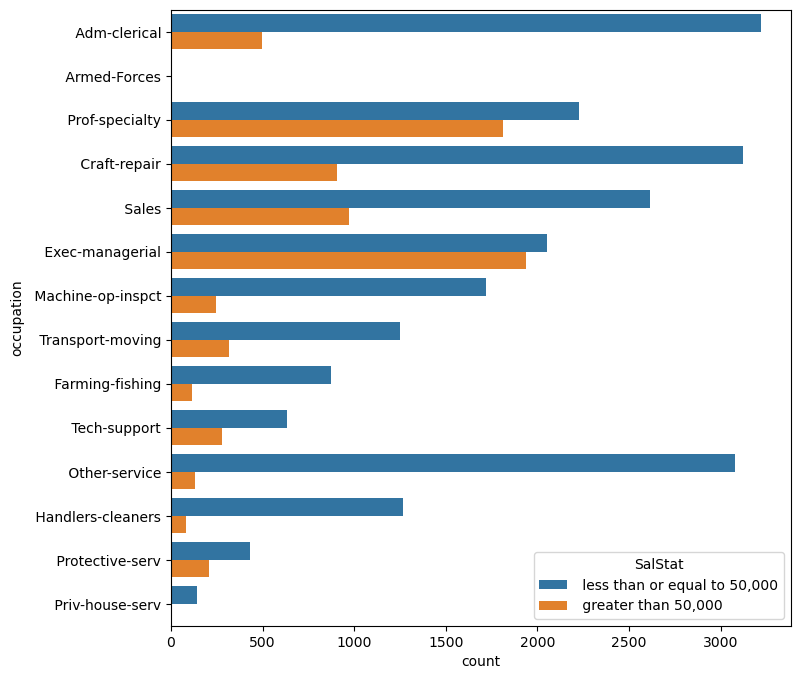

In [44]:
ax, fig = plt.subplots(figsize=[8,8])
Occupation  = sns.countplot(y=df['occupation'],hue = 'SalStat', data=df)

In [46]:
df.groupby('SalStat')['age'].median()

SalStat
 greater than 50,000             43.0
 less than or equal to 50,000    34.0
Name: age, dtype: float64

# Step 5:
## Applying Model

In [47]:
# Reindexing the salary status names to 0,1
df['SalStat']=df['SalStat'].map({' less than or equal to 50,000':0,' greater than 50,000':1})

print(df['SalStat'])

0        0
1        0
2        1
3        0
4        0
        ..
31973    0
31974    0
31975    0
31976    0
31977    0
Name: SalStat, Length: 30162, dtype: int64


In [48]:
income_data= pd.get_dummies(df, drop_first=True)
columns_list=list(income_data.columns)
features=list(set(columns_list)-set(['SalStat']))

In [49]:
y=income_data['SalStat'].values
x = income_data[features].values
print(y)
print(x)

[0 0 1 ... 0 0 0]
[[0 False False ... False False False]
 [0 False True ... False False False]
 [0 False True ... False False False]
 ...
 [0 False True ... False False False]
 [0 False False ... False False False]
 [0 False True ... False False False]]


In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics
target_names = ['<=50K', '>50K']

### REMOVING INSIGNIFICANT VARIABLES

In [51]:
up_income_data = df.copy()
cols = ['gender','nativecountry','race','JobType']
modify_income_data = up_income_data.drop(cols,axis = 1)
updated_income=pd.get_dummies(modify_income_data, drop_first=True)
columns_list = list(updated_income.columns)
features = list(set(columns_list)-set(['SalStat']))

In [52]:
y=updated_income['SalStat'].values
print(y)

[0 0 1 ... 0 0 0]


In [53]:
x = updated_income[features].values
print(x)

[[45 0 False ... False 28 False]
 [24 0 False ... False 40 False]
 [44 0 False ... True 40 False]
 ...
 [23 0 False ... False 40 False]
 [42 0 False ... False 40 False]
 [29 0 False ... True 40 False]]


In [54]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.3)

##  LogisticRegression

In [55]:
logistic_model = LogisticRegression(solver='liblinear')
logistic_model.fit(train_x,train_y)
prediction_log = logistic_model.predict(test_x)

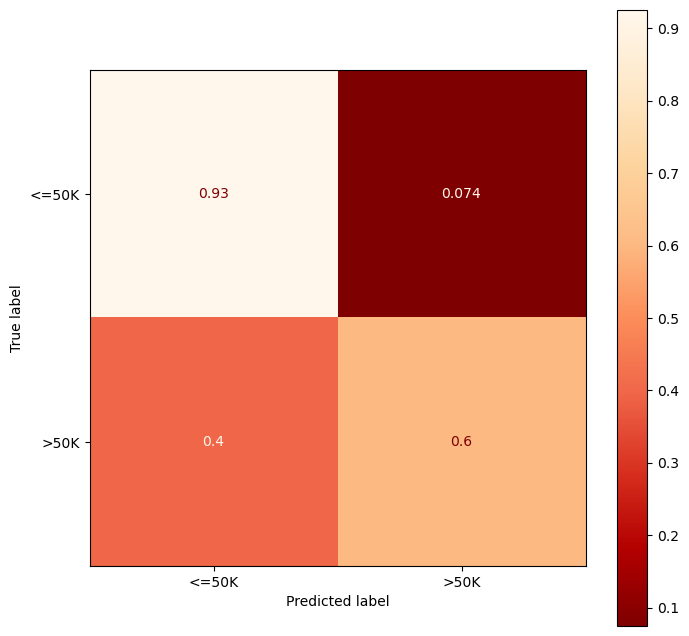

In [56]:
cm = confusion_matrix(test_y, prediction_log.reshape(-1,1), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(8,8))
disp.plot(ax=ax,cmap='OrRd_r')

In [57]:
accuracy_score_log = accuracy_score(test_y, prediction_log)
print(accuracy_score_log)

0.8452867720190076


## KNeighborsClassifier

In [58]:
KNN_classifier = KNeighborsClassifier(n_neighbors = 10)
KNN_classifier.fit(train_x,train_y) 
prediction_knn = KNN_classifier.predict(test_x)

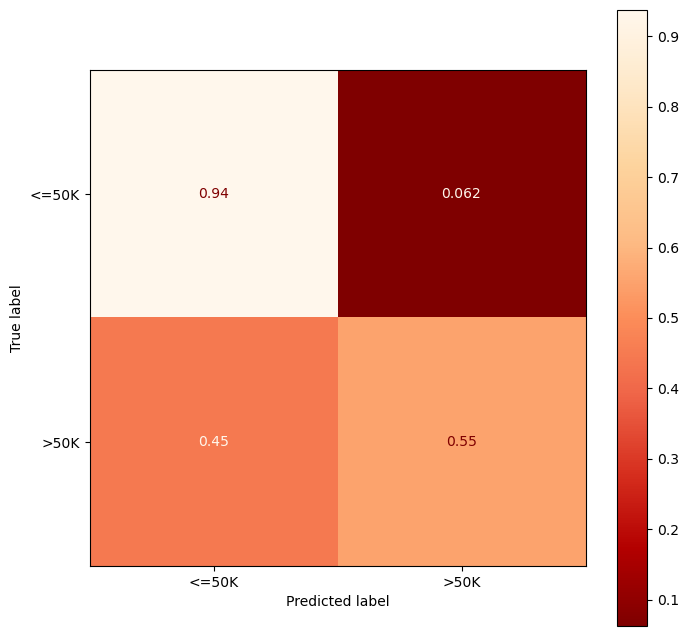

In [59]:
cm = confusion_matrix(test_y, prediction_knn.reshape(-1,1), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(8,8))
disp.plot(ax=ax,cmap='OrRd_r')

In [60]:
accuracy_score_knn = accuracy_score(test_y, prediction_knn)
print(accuracy_score_knn)

0.84208199801083


# Random Forest

In [61]:
clf = RandomForestClassifier(n_estimators = 50)
clf.fit(train_x, train_y)
prediction_rand = clf.predict(test_x)

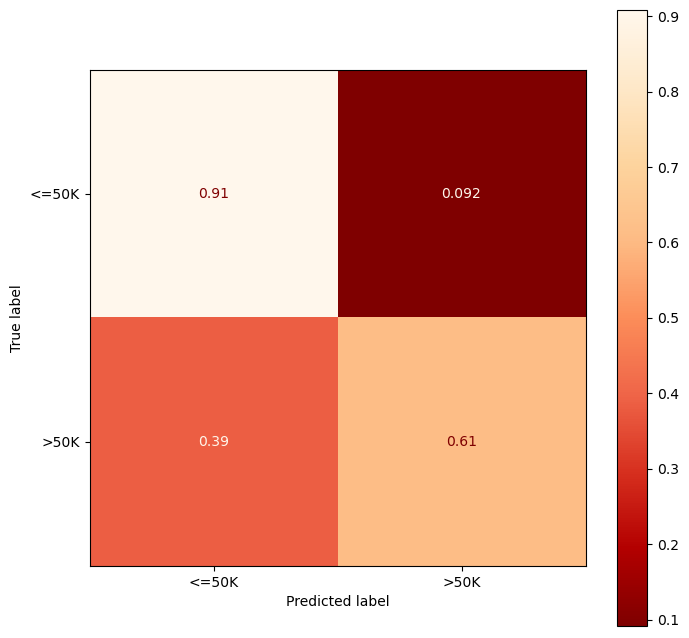

In [62]:
cm = confusion_matrix(test_y, prediction_rand.reshape(-1,1), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(8,8))
disp.plot(ax=ax,cmap='OrRd_r')

In [63]:
accuracy_score_rand = accuracy_score(test_y, prediction_rand)
print(accuracy_score_rand)

0.8352304122002431


# Decision Tree

In [64]:
dtc = DecisionTreeClassifier()
dtc.fit(train_x, train_y)
prediction_dec = dtc.predict(test_x)

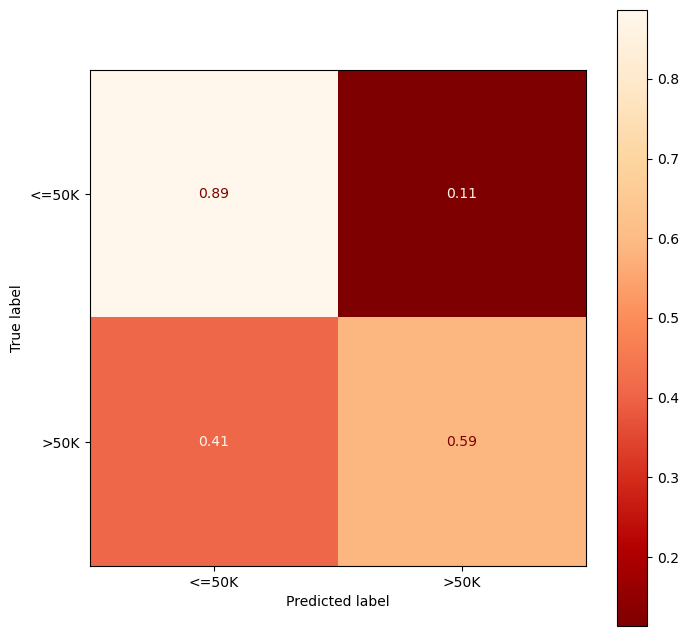

In [65]:
cm = confusion_matrix(test_y, prediction_dec.reshape(-1,1), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(8,8))
disp.plot(ax=ax,cmap='OrRd_r')

In [66]:
accuracy_score_dec = accuracy_score(test_y, prediction_dec)
print(accuracy_score_dec)

0.8125759752458835



| Model      | LogisticRegression | KNeighborsClassifier | Random Forest | Decision Tree |
| ----------- | ----------- |-------------|-------------|-------------|
| accuracy_score      | 0.8497071499613217 |0.8423030169079456 |0.8388772240026522 |0.8157807492540612|


- Thus, Logistic Regression gives best accuracy